# Modeling Layered Realistic Gamma in the Motor Cortex (with BMTK)

In this notebook we will be modeling gamma oscillations found in the motor cortex. When an group of inhibitory and excitatory neurons are connected oscillations naturally occur. The activity from the inhibitory cells cause the excitatory cell population to cease temporarily and when the excitatory behavior returns it is closer to being synchronized. 
All cells used here will be one of two Hodgkin-Huxley (HH) formulated cell types, excitatory **Reduced Traub-Miles** neurons (RTM), and inhibitory, **Wang-Buzsaki** neurons. There is no spatial consideration, cell size, position and distance between neurons will play no effect. The primary focus will be on the effects of synaptic weights, their "tau" and strength of external drive. 
As input to drive the simulation, we will also create an external network of "virtual cells" that synapse directly onto our internal cells and provide spike trains stimulus.

This model was inspired by work done in the book "An Introduction to Neuronal Modeling" by C. Borgers. The structural basis for this notebook was inspired by [BMTK](https://github.com/AllenInstitute/bmtk)'s [Tutorial 4](https://github.com/AllenInstitute/bmtk/blob/develop/docs/tutorial/04_multi_pop.ipynb); some text may come directly from this documentation.

**Note** - scripts and files for running this tutorial can be found in the directory [stochastic_weak_ping](https://github.com/cyneuro/rhythms)

requirements:
* bmtk
* NEURON 7.4+

*Contact Tyler Banks (tbanks@mail.missouri.edu with any questions)*

## 1. Building the network

#### Cells

There will be multiple layers stacked on one another. Each layer will consist of population of 250 detailed neurons: 100 excitatory corticospinal/corticopontine (CP) cells, 100 corticostriatal/cross-corticostriatal (CS) cells, and 50 inhibitory fast spiking inhibitory cells.

Below, we create our network `net` object definition using BMTK. We then instruct the `net` object to `add_nodes` to our network model.

In [1]:
import numpy as np
import logging

from bmtk.builder.networks import NetworkBuilder
from bmtk.builder.auxi.node_params import positions_columinar, xiter_random

build_layer2 = True
build_layer5 = True
build_layer6 = True

layer2_n_CP = 100 # number of layer 2 corticospinal/corticopontine (CP) excitatory cells
layer2_n_CS = 100 # number of layer 2 corticostriatal/crossed-corticostriatal (CS) excitatory cells
layer2_n_FSI = 50  # number of layer 2 fast spiking interneurons (FSI) inhibitory cells
layer2_center = [0, -50.0, 0] # center of layer 2 cylinder [x, y, z]
layer2_max_radius = 30.0 # maxium distance from the center cells can exist in layer 2
layer2_height = 100.0 # maximum height of layer 2 -> center y (+/-) height/2

layer5_n_CP = 100 # number of layer 5 corticospinal/corticopontine (CP) excitatory cells
layer5_n_CS = 100 # number of layer 5 corticostriatal/crossed-corticostriatal (CS) excitatory cells
layer5_n_FSI = 50  # number of layer 5 fast spiking interneurons (FSI) inhibitory cells
layer5_center = [0, 50.0, 0] # center of layer 5 cylinder [x, y, z]
layer5_max_radius = 30.0 # maxium distance from the center cells can exist in layer 5
layer5_height = 100.0 # maximum height of layer 5 -> center y (+/-) height/2

layer6_n_CP = 100 # number of layer 6 corticospinal/corticopontine (CP) excitatory cells
layer6_n_CS = 100 # number of layer 6 corticostriatal/crossed-corticostriatal (CS) excitatory cells
layer6_n_FSI = 50  # number of layer 6 fast spiking interneurons (FSI) inhibitory cells
layer6_center = [0, 150.0, 0] # center of layer 6 cylinder [x, y, z]
layer6_max_radius = 30.0 # maxium distance from the center cells can exist in layer 6
layer6_height = 100.0 # maximum height of layer 6 -> center y (+/-) height/2


net = NetworkBuilder('network')

if build_layer2: 
    net.add_nodes(N=layer2_n_FSI, pop_name='layer2_FSI',     # N = number of inhibitory cells
            positions=positions_columinar(N=layer2_n_FSI, center=layer2_center, 
            max_radius=layer2_max_radius, height=layer2_height),
            rotation_angle_yaxis=xiter_random(N=layer2_n_FSI, min_x=0.0, max_x=2*np.pi),
            rotation_angle_zaxis=xiter_random(N=layer2_n_FSI, min_x=0.0, max_x=2*np.pi),
            model_type='biophysical',
            model_template='hoc:WBInhCell',  # WBInhCell hoc definition
            morphology='blank.swc')

    net.add_nodes(N=layer2_n_CP, pop_name='layer2_CP',     # N = number of excitatory cells
            positions=positions_columinar(N=layer2_n_CP, center=layer2_center, 
            max_radius=layer2_max_radius, height=layer2_height),
            rotation_angle_yaxis=xiter_random(N=layer2_n_CP, min_x=0.0, max_x=2*np.pi),
            rotation_angle_zaxis=xiter_random(N=layer2_n_CP, min_x=0.0, max_x=2*np.pi),
            model_type='biophysical',
            model_template='hoc:RTMExcCell', # RTMExcCell hoc definition
            morphology='blank.swc')
    
    net.add_nodes(N=layer2_n_CS, pop_name='layer2_CS',     # N = number of excitatory cells
            positions=positions_columinar(N=layer2_n_CS, center=layer2_center, 
            max_radius=layer2_max_radius, height=layer2_height),
            rotation_angle_yaxis=xiter_random(N=layer2_n_CS, min_x=0.0, max_x=2*np.pi),
            rotation_angle_zaxis=xiter_random(N=layer2_n_CS, min_x=0.0, max_x=2*np.pi),
            model_type='biophysical',
            model_template='hoc:RTMExcCell', # RTMExcCell hoc definition
            morphology='blank.swc')
    
if build_layer5: 
    net.add_nodes(N=layer5_n_FSI, pop_name='layer5_FSI',     # N = number of inhibitory cells
            positions=positions_columinar(N=layer5_n_FSI, center=layer5_center, 
            max_radius=layer5_max_radius, height=layer5_height),
            rotation_angle_yaxis=xiter_random(N=layer5_n_FSI, min_x=0.0, max_x=2*np.pi),
            rotation_angle_zaxis=xiter_random(N=layer5_n_FSI, min_x=0.0, max_x=2*np.pi),
            model_type='biophysical',
            model_template='hoc:WBInhCell',  # WBInhCell hoc definition
            morphology='blank.swc')

    net.add_nodes(N=layer5_n_CP, pop_name='layer5_CP',     # N = number of excitatory cells
            positions=positions_columinar(N=layer5_n_CP, center=layer5_center, 
            max_radius=layer5_max_radius, height=layer5_height),
            rotation_angle_yaxis=xiter_random(N=layer5_n_CP, min_x=0.0, max_x=2*np.pi),
            rotation_angle_zaxis=xiter_random(N=layer5_n_CP, min_x=0.0, max_x=2*np.pi),
            model_type='biophysical',
            model_template='hoc:RTMExcCell', # RTMExcCell hoc definition
            morphology='blank.swc')
    
    net.add_nodes(N=layer5_n_CS, pop_name='layer5_CS',     # N = number of excitatory cells
            positions=positions_columinar(N=layer5_n_CS, center=layer5_center, 
            max_radius=layer5_max_radius, height=layer5_height),
            rotation_angle_yaxis=xiter_random(N=layer5_n_CS, min_x=0.0, max_x=2*np.pi),
            rotation_angle_zaxis=xiter_random(N=layer5_n_CS, min_x=0.0, max_x=2*np.pi),
            model_type='biophysical',
            model_template='hoc:RTMExcCell', # RTMExcCell hoc definition
            morphology='blank.swc')

if build_layer6: 
    net.add_nodes(N=layer6_n_FSI, pop_name='layer6_FSI',     # N = number of inhibitory cells
            positions=positions_columinar(N=layer6_n_FSI, center=layer6_center, 
            max_radius=layer6_max_radius, height=layer6_height),
            rotation_angle_yaxis=xiter_random(N=layer6_n_FSI, min_x=0.0, max_x=2*np.pi),
            rotation_angle_zaxis=xiter_random(N=layer6_n_FSI, min_x=0.0, max_x=2*np.pi),
            model_type='biophysical',
            model_template='hoc:WBInhCell',  # WBInhCell hoc definition
            morphology='blank.swc')

    net.add_nodes(N=layer6_n_CP, pop_name='layer6_CP',     # N = number of excitatory cells
            positions=positions_columinar(N=layer6_n_CP, center=layer6_center, 
            max_radius=layer6_max_radius, height=layer6_height),
            rotation_angle_yaxis=xiter_random(N=layer6_n_CP, min_x=0.0, max_x=2*np.pi),
            rotation_angle_zaxis=xiter_random(N=layer6_n_CP, min_x=0.0, max_x=2*np.pi),
            model_type='biophysical',
            model_template='hoc:RTMExcCell', # RTMExcCell hoc definition
            morphology='blank.swc')
    
    net.add_nodes(N=layer6_n_CS, pop_name='layer6_CS',     # N = number of excitatory cells
            positions=positions_columinar(N=layer6_n_CS, center=layer6_center, 
            max_radius=layer6_max_radius, height=layer6_height),
            rotation_angle_yaxis=xiter_random(N=layer6_n_CS, min_x=0.0, max_x=2*np.pi),
            rotation_angle_zaxis=xiter_random(N=layer6_n_CS, min_x=0.0, max_x=2*np.pi),
            model_type='biophysical',
            model_template='hoc:RTMExcCell', # RTMExcCell hoc definition
            morphology='blank.swc')
    
    





#### Connections

Now we want to create connections between the cells. Depending on the model type, and whether or not the presynpatic "source" cell is excitory or inhibitory, we will have different synpatic model and parameters. Using the source and target filter parameters, we can create different connection types

To do this we create a customized function `syn_connector` which accepts the probability parameter `p`.

In [2]:
import random

def syn_connector(source,target,p):
    return 1 if random.random() < p else 0

The first two parameters of this function are "source" and "target" and are required for all custom connector functions. These are node objects which gives a representation of a single source and target cell, with properties that can be accessed like a python dictionary. When The Network Builder is creating the connection matrix, it will call this function for all possible source-target pairs. The user doesn't call this function directly.

In `syn_connector`, cells will be connected based on randomized probability. For example, if `p` is set to `.5`, on average, half of the cells will be connected. This function also determines the number of connections between each given source and target cell, in this case we only have one connection but this can be changed if desired. If there are none you can return either None or 0.

To create these connections we call add_edges method of the builder. We use the source and target parameter to filter out only excitory-to-excitory and then excitatory-to-inhibitory connections. We pass in the custom connector function through the connection_rule parameter, and the function parameters (except source and target) through connection_params. (If our `syn_connector` function didn't have any parameters other than source and target, we could just not set connection_params).

The probability that cell types are connected is governed by
* $p_{CPCP}$ (`p_CPCP`) - Probability of Excitatory CP Cells Connecting to Excitatory CP Cells
* $p_{CPCS}$ (`p_CPCS`) - Probability of Excitatory CP Cells Connecting to Excitatory CS Cells
* $p_{CPFSI}$ (`p_CPFSI`) - Probability of Excitatory CP Cells Connecting to Inhibitory FSI Cells

* $p_{CSCP}$ (`p_CSCP`) - Probability of Excitatory CP Cells Connecting to Excitatory CP Cells
* $p_{CSCS}$ (`p_CSCS`) - Probability of Excitatory CP Cells Connecting to Excitatory CS Cells
* $p_{CSFSI}$ (`p_CSFSI`) - Probability of Excitatory CP Cells Connecting to Inhibitory FSI Cells

* $p_{FSICP}$ (`p_FSICP`) - Probability of Inhibitory FSI Cells Cells Connecting to Excitatory CP Cells
* $p_{FSICS}$ (`p_FSICS`) - Probability of Inhibitory FSI Cells Cells Connecting to Excitatory CS Cells
* $p_{FSIFSI}$ (`p_FSIFSI`) - Probability of Inhibitory FSI Cells Cells Connecting to Inhibitory FSI Cells

The **maximum** conductance that can be provided by all input of a specific cell type is provided by $\hat{g}_{XX}$
* $\hat{g}_{CPCP}$ (`g_hat_CPCP`) - Maximum conductance of Excitatory CP Cells Connecting to Excitatory CP Cells
* $\hat{g}_{CPCS}$ (`g_hat_CPCS`) - Maximum conductance of Excitatory CP Cells Connecting to Excitatory CS Cells
* $\hat{g}_{CPFSI}$ (`g_hat_CPFSI`) - Maximum conductance of Excitatory CP Cells Connecting to Inhibitory FSI Cells

* $\hat{g}_{CSCP}$ (`g_hat_CSCP`) - Maximum conductance of Excitatory CP Cells Connecting to Excitatory CP Cells
* $\hat{g}_{CSCS}$ (`g_hat_CSCS`) - Maximum conductance of Excitatory CP Cells Connecting to Excitatory CS Cells
* $\hat{g}_{CSFSI}$ (`g_hat_CSFSI`) - Maximum conductance of Excitatory CP Cells Connecting to Inhibitory FSI Cells

* $\hat{g}_{FSICP}$ (`g_hat_FSICP`) - Maximum conductance of Inhibitory FSI Cells Cells Connecting to Excitatory CP Cells
* $\hat{g}_{FSICS}$ (`g_hat_FSICS`) - Maximum conductance of Inhibitory FSI Cells Cells Connecting to Excitatory CS Cells
* $\hat{g}_{FSIFSI}$ (`g_hat_FSIFSI`) - Maximum conductance of Inhibitory FSI Cells Cells Connecting to Inhibitory FSI Cells


In [3]:
layer2_p_CPCP = 0.0 # Probability of CP connecting to CP
layer2_p_CPCS = 0.0 # Probability of CP connecting to CS
layer2_p_CPFSI = 1.0 # Probability of CP connecting to FSI
layer2_p_CSCP = 0.0 # Probability of CS connecting to CP
layer2_p_CSCS = 0.0 # Probability of CS connecting to CS
layer2_p_CSFSI = 1.0 # Probability of CS connecting to FSI

layer2_g_hat_CPCP = 0.0 # Connection strength CP to CP
layer2_g_hat_CPCS = 0.0 # Connection strength CP to CS
layer2_g_hat_CPFSI = 1.25 # Connection strength CP to FSI
layer2_g_hat_CSCP = 0.0 # Connection strength CS to CP
layer2_g_hat_CSCS = 0.0 # Connection strength CS to CS
layer2_g_hat_CSFSI = 1.25 # Connection strength CS to FSI

if build_layer2:
    # CP
    conn = net.add_edges(source={'pop_name':'layer2_CP'}, target={'pop_name':'layer2_CP'},
                connection_rule=syn_connector,
                connection_params={'p':layer2_p_CPCP},
                syn_weight=layer2_g_hat_CPCP/layer2_n_CP, # Synaptic weight is g^ over the total number of cell in the population
                dynamics_params='PING_ExcToExc.json',
                model_template='exp2syn',
                distance_range=[0.0,999.9],
                delay=0,
                target_sections=['soma'])
    
    conn = net.add_edges(source={'pop_name':'layer2_CP'}, target={'pop_name':'layer2_CS'},
                connection_rule=syn_connector,
                connection_params={'p':layer2_p_CPCS},
                syn_weight=layer2_g_hat_CPCS/layer2_n_CP, # Synaptic weight is g^ over the total number of cell in the population
                dynamics_params='PING_ExcToExc.json',
                model_template='exp2syn',
                distance_range=[0.0,999.9],
                delay=0,
                target_sections=['soma'])

    conn = net.add_edges(source={'pop_name':'layer2_CP'}, target={'pop_name':'layer2_FSI'},
                connection_rule=syn_connector,
                connection_params={'p':layer2_p_CPFSI},
                syn_weight=layer2_g_hat_CPFSI/layer2_n_CP, # Synaptic weight is g^ over the total number of cell in the population
                dynamics_params='PING_ExcToInh.json',
                model_template='exp2syn',
                distance_range=[0.0,999.9],
                delay=0,
                target_sections=['soma'])
    
    # CS
    conn = net.add_edges(source={'pop_name':'layer2_CS'}, target={'pop_name':'layer2_CP'},
                connection_rule=syn_connector,
                connection_params={'p':layer2_p_CSCP},
                syn_weight=layer2_g_hat_CSCP/layer2_n_CS, # Synaptic weight is g^ over the total number of cell in the population
                dynamics_params='PING_ExcToExc.json',
                model_template='exp2syn',
                distance_range=[0.0,999.9],
                delay=0,
                target_sections=['soma'])
    
    conn = net.add_edges(source={'pop_name':'layer2_CS'}, target={'pop_name':'layer2_CS'},
                connection_rule=syn_connector,
                connection_params={'p':layer2_p_CSCS},
                syn_weight=layer2_g_hat_CSCS/layer2_n_CS, # Synaptic weight is g^ over the total number of cell in the population
                dynamics_params='PING_ExcToExc.json',
                model_template='exp2syn',
                distance_range=[0.0,999.9],
                delay=0,
                target_sections=['soma'])

    conn = net.add_edges(source={'pop_name':'layer2_CS'}, target={'pop_name':'layer2_FSI'},
                connection_rule=syn_connector,
                connection_params={'p':layer2_p_CSFSI},
                syn_weight=layer2_g_hat_CSFSI/layer2_n_CS, # Synaptic weight is g^ over the total number of cell in the population
                dynamics_params='PING_ExcToInh.json',
                model_template='exp2syn',
                distance_range=[0.0,999.9],
                delay=0,
                target_sections=['soma'])
    

layer5_p_CPCP = 0.0 # Probability of CP connecting to CP
layer5_p_CPCS = 0.0 # Probability of CP connecting to CS
layer5_p_CPFSI = 1.0 # Probability of CP connecting to FSI
layer5_p_CSCP = 0.0 # Probability of CS connecting to CP
layer5_p_CSCS = 0.0 # Probability of CS connecting to CS
layer5_p_CSFSI = 1.0 # Probability of CS connecting to FSI

layer5_g_hat_CPCP = 0.0 # Connection strength CP to CP
layer5_g_hat_CPCS = 0.0 # Connection strength CP to CS
layer5_g_hat_CPFSI = 1.25 # Connection strength CP to FSI
layer5_g_hat_CSCP = 0.0 # Connection strength CS to CP
layer5_g_hat_CSCS = 0.0 # Connection strength CS to CS
layer5_g_hat_CSFSI = 1.25 # Connection strength CS to FSI
    
if build_layer5:
    # CP
    conn = net.add_edges(source={'pop_name':'layer5_CP'}, target={'pop_name':'layer5_CP'},
                connection_rule=syn_connector,
                connection_params={'p':layer5_p_CPCP},
                syn_weight=layer5_g_hat_CPCP/layer5_n_CP, # Synaptic weight is g^ over the total number of cell in the population
                dynamics_params='PING_ExcToExc.json',
                model_template='exp2syn',
                distance_range=[0.0,999.9],
                delay=0,
                target_sections=['soma'])
    
    conn = net.add_edges(source={'pop_name':'layer5_CP'}, target={'pop_name':'layer5_CS'},
                connection_rule=syn_connector,
                connection_params={'p':layer5_p_CPCS},
                syn_weight=layer5_g_hat_CPCS/layer5_n_CP, # Synaptic weight is g^ over the total number of cell in the population
                dynamics_params='PING_ExcToExc.json',
                model_template='exp2syn',
                distance_range=[0.0,999.9],
                delay=0,
                target_sections=['soma'])

    conn = net.add_edges(source={'pop_name':'layer5_CP'}, target={'pop_name':'layer5_FSI'},
                connection_rule=syn_connector,
                connection_params={'p':layer5_p_CPFSI},
                syn_weight=layer5_g_hat_CPFSI/layer5_n_CP, # Synaptic weight is g^ over the total number of cell in the population
                dynamics_params='PING_ExcToInh.json',
                model_template='exp2syn',
                distance_range=[0.0,999.9],
                delay=0,
                target_sections=['soma'])
    
    # CS
    conn = net.add_edges(source={'pop_name':'layer5_CS'}, target={'pop_name':'layer5_CP'},
                connection_rule=syn_connector,
                connection_params={'p':layer5_p_CSCP},
                syn_weight=layer5_g_hat_CSCP/layer5_n_CS, # Synaptic weight is g^ over the total number of cell in the population
                dynamics_params='PING_ExcToExc.json',
                model_template='exp2syn',
                distance_range=[0.0,999.9],
                delay=0,
                target_sections=['soma'])
    
    conn = net.add_edges(source={'pop_name':'layer5_CS'}, target={'pop_name':'layer5_CS'},
                connection_rule=syn_connector,
                connection_params={'p':layer5_p_CSCS},
                syn_weight=layer5_g_hat_CSCS/layer5_n_CS, # Synaptic weight is g^ over the total number of cell in the population
                dynamics_params='PING_ExcToExc.json',
                model_template='exp2syn',
                distance_range=[0.0,999.9],
                delay=0,
                target_sections=['soma'])

    conn = net.add_edges(source={'pop_name':'layer5_CS'}, target={'pop_name':'layer5_FSI'},
                connection_rule=syn_connector,
                connection_params={'p':layer5_p_CSFSI},
                syn_weight=layer5_g_hat_CSFSI/layer5_n_CS, # Synaptic weight is g^ over the total number of cell in the population
                dynamics_params='PING_ExcToInh.json',
                model_template='exp2syn',
                distance_range=[0.0,999.9],
                delay=0,
                target_sections=['soma'])

layer6_p_CPCP = 0.0 # Probability of CP connecting to CP
layer6_p_CPCS = 0.0 # Probability of CP connecting to CS
layer6_p_CPFSI = 1.0 # Probability of CP connecting to FSI
layer6_p_CSCP = 0.0 # Probability of CS connecting to CP
layer6_p_CSCS = 0.0 # Probability of CS connecting to CS
layer6_p_CSFSI = 1.0 # Probability of CS connecting to FSI

layer6_g_hat_CPCP = 0.0 # Connection strength CP to CP
layer6_g_hat_CPCS = 0.0 # Connection strength CP to CS
layer6_g_hat_CPFSI = 1.25 # Connection strength CP to FSI
layer6_g_hat_CSCP = 0.0 # Connection strength CS to CP
layer6_g_hat_CSCS = 0.0 # Connection strength CS to CS
layer6_g_hat_CSFSI = 1.25 # Connection strength CS to FSI

if build_layer6:
    # CP
    conn = net.add_edges(source={'pop_name':'layer6_CP'}, target={'pop_name':'layer6_CP'},
                connection_rule=syn_connector,
                connection_params={'p':layer6_p_CPCP},
                syn_weight=layer6_g_hat_CPCP/layer6_n_CP, # Synaptic weight is g^ over the total number of cell in the population
                dynamics_params='PING_ExcToExc.json',
                model_template='exp2syn',
                distance_range=[0.0,999.9],
                delay=0,
                target_sections=['soma'])
    
    conn = net.add_edges(source={'pop_name':'layer6_CP'}, target={'pop_name':'layer6_CS'},
                connection_rule=syn_connector,
                connection_params={'p':layer6_p_CPCS},
                syn_weight=layer6_g_hat_CPCS/layer6_n_CP, # Synaptic weight is g^ over the total number of cell in the population
                dynamics_params='PING_ExcToExc.json',
                model_template='exp2syn',
                distance_range=[0.0,999.9],
                delay=0,
                target_sections=['soma'])

    conn = net.add_edges(source={'pop_name':'layer6_CP'}, target={'pop_name':'layer6_FSI'},
                connection_rule=syn_connector,
                connection_params={'p':layer6_p_CPFSI},
                syn_weight=layer6_g_hat_CPFSI/layer6_n_CP, # Synaptic weight is g^ over the total number of cell in the population
                dynamics_params='PING_ExcToInh.json',
                model_template='exp2syn',
                distance_range=[0.0,999.9],
                delay=0,
                target_sections=['soma'])
    
    # CS
    conn = net.add_edges(source={'pop_name':'layer6_CS'}, target={'pop_name':'layer6_CP'},
                connection_rule=syn_connector,
                connection_params={'p':layer6_p_CSCP},
                syn_weight=layer6_g_hat_CSCP/layer6_n_CS, # Synaptic weight is g^ over the total number of cell in the population
                dynamics_params='PING_ExcToExc.json',
                model_template='exp2syn',
                distance_range=[0.0,999.9],
                delay=0,
                target_sections=['soma'])
    
    conn = net.add_edges(source={'pop_name':'layer6_CS'}, target={'pop_name':'layer6_CS'},
                connection_rule=syn_connector,
                connection_params={'p':layer6_p_CSCS},
                syn_weight=layer6_g_hat_CSCS/layer6_n_CS, # Synaptic weight is g^ over the total number of cell in the population
                dynamics_params='PING_ExcToExc.json',
                model_template='exp2syn',
                distance_range=[0.0,999.9],
                delay=0,
                target_sections=['soma'])

    conn = net.add_edges(source={'pop_name':'layer6_CS'}, target={'pop_name':'layer6_FSI'},
                connection_rule=syn_connector,
                connection_params={'p':layer6_p_CSFSI},
                syn_weight=layer6_g_hat_CSFSI/layer6_n_CS, # Synaptic weight is g^ over the total number of cell in the population
                dynamics_params='PING_ExcToInh.json',
                model_template='exp2syn',
                distance_range=[0.0,999.9],
                delay=0,
                target_sections=['soma'])


Similarly we create the other inhibitory connections.

In [4]:
layer2_p_FSICP = 1.0 # Probability of FSI connecting to CP
layer2_p_FSICS = 1.0 # Probability of FSI connecting to CS
layer2_p_FSIFSI = 1.0 # Probability of FSI connecting to FSI

layer2_g_hat_FSICP = 1.25 # Connection strength FSI to CP
layer2_g_hat_FSICS = 1.25 # Connection strength FSI to CS
layer2_g_hat_FSIFSI = 0.4 # Connection strength FSI to FSI

if build_layer2:
    # FSI
    conn = net.add_edges(source={'pop_name':'layer2_FSI'}, target={'pop_name':'layer2_CP'},
                connection_rule=syn_connector,
                connection_params={'p':layer2_p_FSICP},
                syn_weight=layer2_g_hat_FSICP/layer2_n_FSI, # Synaptic weight is g^ over the total number of cell in the population
                dynamics_params='PING_InhToExc.json',
                model_template='exp2syn',
                distance_range=[0.0,999.9],
                delay=0,
                target_sections=['soma'])
    
    conn = net.add_edges(source={'pop_name':'layer2_FSI'}, target={'pop_name':'layer2_CS'},
                connection_rule=syn_connector,
                connection_params={'p':layer2_p_FSICS},
                syn_weight=layer2_g_hat_FSICS/layer2_n_FSI, # Synaptic weight is g^ over the total number of cell in the population
                dynamics_params='PING_InhToExc.json',
                model_template='exp2syn',
                distance_range=[0.0,999.9],
                delay=0,
                target_sections=['soma'])


    conn = net.add_edges(source={'pop_name':'layer2_FSI'}, target={'pop_name':'layer2_FSI'},
                connection_rule=syn_connector,
                connection_params={'p':layer2_p_FSIFSI},
                syn_weight=layer2_g_hat_FSIFSI/layer2_n_FSI, # Synaptic weight is g^ over the total number of cell in the population
                dynamics_params='PING_InhToInh.json',
                model_template='exp2syn',
                distance_range=[0.0,999.9],
                delay=0,
                target_sections=['soma'])
    
layer5_p_FSICP = 1.0 # Probability of FSI connecting to CP
layer5_p_FSICS = 1.0 # Probability of FSI connecting to CS
layer5_p_FSIFSI = 1.0 # Probability of FSI connecting to FSI
layer5_g_hat_FSICP = 1.25 # Connection strength FSI to CP
layer5_g_hat_FSICS = 1.25 # Connection strength FSI to CS
layer5_g_hat_FSIFSI = 0.4 # Connection strength FSI to FSI

if build_layer5:
    # FSI
    conn = net.add_edges(source={'pop_name':'layer5_FSI'}, target={'pop_name':'layer5_CP'},
                connection_rule=syn_connector,
                connection_params={'p':layer5_p_FSICP},
                syn_weight=layer5_g_hat_FSICP/layer5_n_FSI, # Synaptic weight is g^ over the total number of cell in the population
                dynamics_params='PING_InhToExc.json',
                model_template='exp2syn',
                distance_range=[0.0,999.9],
                delay=0,
                target_sections=['soma'])
    
    conn = net.add_edges(source={'pop_name':'layer5_FSI'}, target={'pop_name':'layer5_CS'},
                connection_rule=syn_connector,
                connection_params={'p':layer5_p_FSICS},
                syn_weight=layer5_g_hat_FSICS/layer5_n_FSI, # Synaptic weight is g^ over the total number of cell in the population
                dynamics_params='PING_InhToExc.json',
                model_template='exp2syn',
                distance_range=[0.0,999.9],
                delay=0,
                target_sections=['soma'])


    conn = net.add_edges(source={'pop_name':'layer5_FSI'}, target={'pop_name':'layer5_FSI'},
                connection_rule=syn_connector,
                connection_params={'p':layer5_p_FSIFSI},
                syn_weight=layer5_g_hat_FSIFSI/layer5_n_FSI, # Synaptic weight is g^ over the total number of cell in the population
                dynamics_params='PING_InhToInh.json',
                model_template='exp2syn',
                distance_range=[0.0,999.9],
                delay=0,
                target_sections=['soma'])

layer6_p_FSICP = 1.0 # Probability of FSI connecting to CP
layer6_p_FSICS = 1.0 # Probability of FSI connecting to CS
layer6_p_FSIFSI = 1.0 # Probability of FSI connecting to FSI

layer6_g_hat_FSICP = 1.25 # Connection strength FSI to CP
layer6_g_hat_FSICS = 1.25 # Connection strength FSI to CS
layer6_g_hat_FSIFSI = 0.4 # Connection strength FSI to FSI

if build_layer6:
    # FSI
    conn = net.add_edges(source={'pop_name':'layer6_FSI'}, target={'pop_name':'layer6_CP'},
                connection_rule=syn_connector,
                connection_params={'p':layer6_p_FSICP},
                syn_weight=layer6_g_hat_FSICP/layer6_n_FSI, # Synaptic weight is g^ over the total number of cell in the population
                dynamics_params='PING_InhToExc.json',
                model_template='exp2syn',
                distance_range=[0.0,999.9],
                delay=0,
                target_sections=['soma'])
    
    conn = net.add_edges(source={'pop_name':'layer6_FSI'}, target={'pop_name':'layer6_CS'},
                connection_rule=syn_connector,
                connection_params={'p':layer6_p_FSICS},
                syn_weight=layer6_g_hat_FSICS/layer6_n_FSI, # Synaptic weight is g^ over the total number of cell in the population
                dynamics_params='PING_InhToExc.json',
                model_template='exp2syn',
                distance_range=[0.0,999.9],
                delay=0,
                target_sections=['soma'])


    conn = net.add_edges(source={'pop_name':'layer6_FSI'}, target={'pop_name':'layer6_FSI'},
                connection_rule=syn_connector,
                connection_params={'p':layer6_p_FSIFSI},
                syn_weight=layer6_g_hat_FSIFSI/layer6_n_FSI, # Synaptic weight is g^ over the total number of cell in the population
                dynamics_params='PING_InhToInh.json',
                model_template='exp2syn',
                distance_range=[0.0,999.9],
                delay=0,
                target_sections=['soma'])



#### Synaptic properties

For this model, we'll be using `NEURON`'s built-in [`exp2syn`](https://www.neuron.yale.edu/neuron/static/py_doc/modelspec/programmatic/mechanisms/mech.html#Exp2Syn) synapse, which will provide simple rise and decay dynamics. 

You may have noticed the `dynamics_params` parameter in the previous `add_edges` function calls. These files contain values that will be passed to the simulator at runtime. They'll located in the `components/synaptic_models` directory. We'll need four separate files - `PING_ExcToExc.json` for excitatory to excitatory, `PING_ExcToInh.json` for excitatory to inhibitory, `PING_InhToExc.json` for inhibitory to excitatory, and `PING_InhToInh.json` for inhibitory to inhibitory connections. An example of one is shown below. Edit these files **directly** (and not here), before running the simulation to test different synaptic parameters.

```json
{
    "tau1": 0.5,
    "tau2": 3,
    "erev": 0
}
```

`"tau1"` is the synapse rise time, `"tau1"` is the decay, and `"erev"` is the reversal potential.

#### Building

Finally we build the network (this may take a bit of time since it's iterating over all 250x250 possible connection combinations), and save the nodes and edges.

In [5]:
net.build()
net.save_nodes(output_dir='network')
net.save_edges(output_dir='network')

### Building external network

Next we want to create an external network consisting of virtual cells that form a feedforward network onto our PING network, which will provide input during the simulation. We will call this `extnet`, (if we wanted to we could also create multiple external networks and run simulations on any number of them). 

First we build our `extnet` nodes. Then we must import the `network` nodes, and create connections between `extnet` --> `network`.

In [6]:
from bmtk.builder.networks import NetworkBuilder

extnet = NetworkBuilder('extnet')

if build_layer2:
    extnet.add_nodes(N=layer2_n_CP, model_type='virtual', pop_name='bgnoisevirtL2CP')
if build_layer5:
    extnet.add_nodes(N=layer5_n_CP, model_type='virtual', pop_name='bgnoisevirtL5CP')
if build_layer6:
    extnet.add_nodes(N=layer6_n_CP, model_type='virtual', pop_name='bgnoisevirtL6CP')

if build_layer2:
    extnet.add_nodes(N=layer2_n_CS, model_type='virtual', pop_name='bgnoisevirtL2CS')
if build_layer5:
    extnet.add_nodes(N=layer5_n_CS, model_type='virtual', pop_name='bgnoisevirtL5CS')
if build_layer6:
    extnet.add_nodes(N=layer6_n_CS, model_type='virtual', pop_name='bgnoisevirtL6CS')


As before, we will use a customized function to determine the number of connections between each source and target pair, however this time our connection_rule is a bit different

In the previous example, our connection_rule function's first two arguments were the presynaptic and postsynaptic cells, which allowed us to choose how many synaptic connections between the pairs existed based on individual properties:
```python
def connection_fnc(source, target, ...):
    source['param'] # presynaptic cell params
    target['param'] # postsynaptic cell params
    ...
    return nsyns # number of connections between pair
```

But for our `extnet` --> `network` connection, we do things a bit differently. We want to make sure that for every source cell, there are a limited number of presynaptic targets or in this case, exactly 1. This is a not really possible with a function that iterates on a one-to-one basis. So instead we have a connector function who's first parameter is a single source cell, and the second parameter is a list of N target cells. We return an array of integers, size N; which each index represents the number of synapses between source and the targets. 

To tell the builder to use this schema, we must set `iterator='one_to_all'` in the `add_edges` method. (By default this is set to 'one_to_one'. You can also use 'all_to_one' iterator which will pass in all possible single sources and a single target).

In [7]:
def target_ind_equals_source_ind(source, targets, offset=0, min_syn=1,max_syn=1):
    # Creates a 1 to 1 mapping between source and destination nodes
    total_targets = len(targets)
    syns = np.zeros(total_targets)
    target_index = source['node_id']
        
    syns[target_index-offset] = 1
    return syns
    
layer2_g_bar_stoch = 0.03
layer5_g_bar_stoch = 0.03
layer6_g_bar_stoch = 0.03

if build_layer2:
    
    offset = 0

    conn = extnet.add_edges(target=net.nodes(pop_name='layer2_CP'),
                source={'pop_name':'bgnoisevirtL2CP'},
                iterator='one_to_all',
                connection_rule=target_ind_equals_source_ind,
                connection_params={'offset':offset},
                dynamics_params='PING_ExcToExc.json',
                model_template='exp2syn',
                distance_range=[0.0,999.9],
                target_sections=['soma'],
                delay=0,
                syn_weight=layer2_g_bar_stoch
                )
    
    offset = layer2_n_CP
    
    if build_layer5:
        offset = offset + layer5_n_CP
    if build_layer6:
        offset = offset + layer6_n_CP
        
    
    conn = extnet.add_edges(target=net.nodes(pop_name='layer2_CS'),
                source={'pop_name':'bgnoisevirtL2CS'},
                iterator='one_to_all',
                connection_rule=target_ind_equals_source_ind,
                connection_params={'offset':offset},
                dynamics_params='PING_ExcToExc.json',
                model_template='exp2syn',
                distance_range=[0.0,999.9],
                target_sections=['soma'],
                delay=0,
                syn_weight=layer2_g_bar_stoch
                )
        
    
if build_layer5:
    
    offset = 0
    
    if build_layer2:
        offset = offset + layer2_n_CP
        
    conn = extnet.add_edges(target=net.nodes(pop_name='layer5_CP'),
                source={'pop_name':'bgnoisevirtL5CP'},
                iterator='one_to_all',
                connection_rule=target_ind_equals_source_ind,
                connection_params={'offset':offset},
                dynamics_params='PING_ExcToExc.json',
                model_template='exp2syn',
                distance_range=[0.0,999.9],
                target_sections=['soma'],
                delay=0,
                syn_weight=layer5_g_bar_stoch
                )
    
    offset = layer5_n_CP
    
    if build_layer2:
        offset = offset + layer2_n_CP
        offset = offset + layer2_n_CS
    if build_layer6:
        offset = offset + layer6_n_CP
        
    
    conn = extnet.add_edges(target=net.nodes(pop_name='layer5_CS'),
                source={'pop_name':'bgnoisevirtL5CS'},
                iterator='one_to_all',
                connection_rule=target_ind_equals_source_ind,
                connection_params={'offset':offset},
                dynamics_params='PING_ExcToExc.json',
                model_template='exp2syn',
                distance_range=[0.0,999.9],
                target_sections=['soma'],
                delay=0,
                syn_weight=layer2_g_bar_stoch
                )

if build_layer6:
    
    offset = 0
    
    if build_layer2:
        offset = offset + layer2_n_CP
    if build_layer5:
        offset = offset + layer5_n_CP
    
    conn = extnet.add_edges(target=net.nodes(pop_name='layer6_CP'),
                source={'pop_name':'bgnoisevirtL6CP'},
                iterator='one_to_all',
                connection_rule=target_ind_equals_source_ind,
                connection_params={'offset':offset},
                dynamics_params='PING_ExcToExc.json',
                model_template='exp2syn',
                distance_range=[0.0,999.9],
                target_sections=['soma'],
                delay=0,
                syn_weight=layer6_g_bar_stoch
                )
    
    offset = layer6_n_CP
    
    if build_layer2:
        offset = offset + layer2_n_CP
        offset = offset + layer2_n_CS
    if build_layer5:
        offset = offset + layer5_n_CP
        offset = offset + layer5_n_CS
        
    
    conn = extnet.add_edges(target=net.nodes(pop_name='layer6_CS'),
                source={'pop_name':'bgnoisevirtL6CS'},
                iterator='one_to_all',
                connection_rule=target_ind_equals_source_ind,
                connection_params={'offset':offset},
                dynamics_params='PING_ExcToExc.json',
                model_template='exp2syn',
                distance_range=[0.0,999.9],
                target_sections=['soma'],
                delay=0,
                syn_weight=layer2_g_bar_stoch
                )

   
extnet.build()
extnet.save_nodes(output_dir='network')
extnet.save_edges(output_dir='network')

In the above code, we have our `extnet` object `add_edges` where the target cell type's `pop_name` is `'Exc'` in the `net` network. The strength of the external input is defined by $\bar{g}_{stoch}$ (`g_bar_stoch`). 

**!! Change the value of $\bar{g}_{stoch}$ (`g_bar_stoch`) to determine the effect of external input (provided to our excitatory cells) on the gamma frequency!!**

## 2. Setting up BioNet

#### file structure.

Before running a simulation, we will need to create the runtime environment, including parameter files, run-script and configuration files. We will copy the other necessary files from an existing simuation. The following command has been executed for us:

```bash
$ python -m bmtk.utils.sim_setup  \
   --network network              \
   --dt 0.1                       \
   --tstop 1000.0                 \
   bionet .
```

$ python -m bmtk.utils.sim_setup --network network --dt 0.1 --tstop 1000.0 bionet .

It can also be run directly in python (see commented out code)

In [8]:
from bmtk.utils.sim_setup import build_env_bionet

sim_len = 1000.0
dt = 0.1

# This step has already been performed for you. 
# Running again will remove customized configuration files. 
# If you wish to run again, remove comment tags below.

#build_env_bionet(base_dir='.',      
#                 network_dir='network',
#                 tstop=sim_len, dt=dt
#                )


This will fill out the our current directory with all the files we need to get started to run the simulation. Of interest includes

* **circuit_config.json** - A configuration file that contains the location of the network files we created above. Plus location of neuron and synpatic models, templates, morphologies and mechanisms required to build our instantiate individual cell models.


* **simulation_config.json** - contains information about the simulation. Including initial conditions and run-time configuration (_run_ and _conditions_). In the _inputs_ section we define what external sources we will use to drive the network (in this case a current clamp). And in the _reports_ section we define the variables (soma membrane potential and calcium) that will be recorded during the simulation 


* **run_bionent.py** - A script for running our simulation outside of our Jupyter notebook. Usually this file doesn't need to be modified.

* **components/synaptic_models/** - Parameter files used to create different types of synapses.


#### circuit_config.json
The `circuit_config.json` file will need to be modified to specify our network configuration files generated previously. Your `"networks"` section should look like the following. These files were generated previously with our `save_nodes` and `save_edges` function calls.

```json
  "networks": {
    "nodes": [
      {
        "nodes_file": "$NETWORK_DIR/network_nodes.h5",
        "node_types_file": "$NETWORK_DIR/network_node_types.csv"
      },
      {
        "nodes_file": "$NETWORK_DIR/extnet_nodes.h5",
        "node_types_file": "$NETWORK_DIR/extnet_node_types.csv"
      }
    ],
    "edges": [
      {
        "edges_file": "$NETWORK_DIR/network_network_edges.h5",
        "edge_types_file": "$NETWORK_DIR/network_network_edge_types.csv" 
      },
      {
        "edges_file": "$NETWORK_DIR/extnet_network_edges.h5",
        "edge_types_file": "$NETWORK_DIR/extnet_network_edge_types.csv" 
      }
    ],
    "gap_juncs": []
  }
```

#### External Input

We need to provide two types of input to our cells. First, to our `extnet` external network cells with spike-trains so they can activate our network in a synchronized mannor. Second, a constant current injection to increase all cell's excitability.

First, we must edit the **simulation_config.json** file to tell the simulator to find the **.h5** files and which network to associate it with. **This has already been done for you**

```json
{
  "node_sets": {
    "exc": {
      "pop_name":"bgnoisevirtExc"
    }
  },
  "inputs": {
    "noise": {
      "input_type": "spikes",
      "module": "sonata",
      "input_file": "input/ext_inp_poisson.h5",
      "node_set": "exc"
    },
    "file_current_clamp": {
      "input_type": "file_current_clamp",
      "module": "FileIClamp",
      "input_file":"input/amps.h5",
      "node_set":"all"
    }
  }
}
```

In the `"node_sets"` section we specify a set of nodes that we want input provided to.

Next, we need to generate the previously specified `input/ext_inp_poisson.h5` file. The implementation details of this section of code aren't important but what we need to do is provide each artificial cell a poisson input drive at the $f_{stoch}$ (`stoch_freq`) frequency.

In [9]:
def generate_ext_poisson_input(ranges,freq=60,population='extnet',times=(0.0, 1.0),filename='input/ext_inp_poisson.h5'):
    '''
    Generate poisson input for ext cells
    '''
    import os
    from bmtk.utils.reports.spike_trains import PoissonSpikeGenerator
    
    try:
        os.remove(filename)
    except OSError:
        pass
    
    psg = PoissonSpikeGenerator(population=population)
    
    for r in ranges:
        psg.add(node_ids=r,  # Select nodes
                firing_rate=freq,     # 'freq' Hz, we can also pass in a nonhomoegenous function/array
                times=times)    # Firing starts at 0 s up to 1 s by default
    psg.to_sonata(filename)
    logging.info(filename + " written")


stoch_freq = 60

ranges = []

offset = 0
if build_layer2:
    e_nodes = layer2_n_CP + layer2_n_CS
    ranges.append(range(offset,offset+e_nodes))
    offset = e_nodes
if build_layer5:
    e_nodes = layer5_n_CP + layer5_n_CS
    ranges.append(range(offset,offset+e_nodes))
    offset = e_nodes
if build_layer6:
    e_nodes = layer6_n_CP + layer6_n_CS
    ranges.append(range(offset,offset+e_nodes))
    offset = e_nodes


generate_ext_poisson_input(ranges,freq=stoch_freq,filename='input/ext_inp_poisson.h5')


**!! Alter the value of $f_{stoch}$ (`stoch_freq`) to increase of decrease the input drive!!** 

Now we need to generate a constant current drive for both RTM and WB cells. 

The *i*-th excitatory cell and *j*-th inhibitory cell receives the following input drives respecively:

* $I_{E,i} = \bar{I}_{E}(1+\sigma_{E}X_{i})$ 
* $I_{I,j} = \bar{I}_{I}(1+\sigma_{I}X_{j})$ 

Where $X_{i}$ and $Y_{j}$ are independent Gaussians.

In [10]:
import h5py

I_bar_E = 0.6 #1.4 
sigma_E = 0.0 #0.05
I_bar_I = 0.6 #0.0
sigma_I = 0.0

samples = int(sim_len/dt)
total_num_cells = 0
layer2_e_start = 0
layer5_e_start = 0
layer6_e_start = 0
layer2_e_end = 0
layer5_e_end = 0
layer6_e_end = 0
layer2_i_start = 0
layer5_i_start = 0
layer6_i_start = 0
layer2_i_end = 0
layer5_i_end = 0
layer6_i_end = 0

if build_layer2:
    layer2_i_start = 0
    layer2_i_end = layer2_i_start + layer2_n_FSI
    layer2_e_start = layer2_n_FSI
    layer2_e_end = layer2_e_start + layer2_n_CP + layer2_n_CS
    total_num_cells = total_num_cells + layer2_n_CP + layer2_n_CS + layer2_n_FSI
if build_layer5:
    layer5_i_start = total_num_cells
    layer5_i_end = layer5_i_start + layer5_n_FSI
    layer5_e_start = layer5_n_FSI + total_num_cells
    layer5_e_end = layer5_e_start + layer5_n_CP + layer5_n_CS
    total_num_cells = total_num_cells + layer5_n_CP + layer5_n_CS + layer5_n_FSI
if build_layer6:
    layer6_i_start = total_num_cells
    layer6_i_end = layer6_i_start + layer6_n_FSI
    layer6_e_start = layer6_n_FSI + total_num_cells
    layer6_e_end = layer6_e_start + layer6_n_CP + layer6_n_CS
    total_num_cells = total_num_cells + layer6_n_CP + layer6_n_CS + layer6_n_FSI
    
amp = np.zeros((total_num_cells,samples))

#amp[:n_E,:] = (I_bar_E * (1 + sigma_E*np.random.normal(size=n_E))).reshape(-1,1) # Excitatory Cell Current Injection
#amp[n_E:,:] = (I_bar_I * (1 + sigma_I*np.random.normal(size=n_I))).reshape(-1,1) # Inhibitory Cell Current Injection

if build_layer2:
    amp[layer2_e_start:layer2_e_end,:] = (I_bar_E * (1 + sigma_E*np.random.normal(size=layer2_n_CP+layer2_n_CS))).reshape(-1,1) # Excitatory Cell Current Injection
    amp[layer2_i_start:layer2_i_end,:] = (I_bar_I * (1 + sigma_I*np.random.normal(size=layer2_n_FSI))).reshape(-1,1) # Inhibitory Cell Current Injection

if build_layer5:
    amp[layer5_e_start:layer5_e_end,:] = (I_bar_E * (1 + sigma_E*np.random.normal(size=layer5_n_CP+layer5_n_CS))).reshape(-1,1) # Excitatory Cell Current Injection
    amp[layer5_i_start:layer5_i_end,:] = (I_bar_I * (1 + sigma_I*np.random.normal(size=layer5_n_FSI))).reshape(-1,1) # Inhibitory Cell Current Injection

if build_layer6:
    amp[layer6_e_start:layer6_e_end,:] = (I_bar_E * (1 + sigma_E*np.random.normal(size=layer6_n_CP+layer6_n_CS))).reshape(-1,1) # Excitatory Cell Current Injection
    amp[layer6_i_start:layer6_i_end,:] = (I_bar_I * (1 + sigma_I*np.random.normal(size=layer6_n_FSI))).reshape(-1,1) # Inhibitory Cell Current Injection

    #amp[layer5_n_I:,:] = (I_bar_E * (1 + sigma_E*np.random.normal(size=layer5_n_E))).reshape(-1,1) # Excitatory Cell Current Injection
    #amp[:layer5_n_I,:] = (I_bar_I * (1 + sigma_I*np.random.normal(size=layer5_n_I))).reshape(-1,1) # Inhibitory Cell Current Injection


dts = [1]
gids = "all"

#hf.close() # Uncomment this line temporarily if you receive 'file already open error'

hf = h5py.File("input/amps.h5", 'w')

hf.create_dataset("amplitudes", data=[amp])
hf.create_dataset("gids", data=gids)
hf.create_dataset("dts", data=dts)

hf.close()

#### Cell definitions

For reference - template hoc files should be defined in `templates.hoc` and placed in the `components/templates` directory. Cells utilize the following the definitions and include a sodium, potassium, and leak channel.

$C \frac{dV_{m}}{dt} = -\bar{g}_{K}n^4(V_{m} - V_{K}) - \bar{g}_{Na}m^3h(V_{m} - V_{Na}) - \bar{g}_{l}(V_{m} - V_{l}) + I$

* $\frac{dn}{dt} = \alpha_{n}(V_{m})(1-n) - \beta_n(V_m)n$
* $\frac{dm}{dt} = \alpha_{m}(V_{m})(1-m) - \beta_m(V_m)m$
* $\frac{dh}{dt} = \alpha_{h}(V_{m})(1-h) - \beta_h(V_m)h$

**RTM Cell**
* $\alpha_{n} = 0.032*(v+52)/(1-e^{-(v+52)/5})$
* $\beta_{n} = 0.5*e^{-(v+57)/40}$
* $\alpha_{m} = 0.32*(v+54)/(1-e^{-(v+54)/4})$
* $\beta_{m} = 0.28*(v+27)/(e^{(v+27)/5}-1)$
* $\alpha_{h} = 0.128*e^{-(v+50)/18}$
* $\beta_{h} = 4./(1+e^{-(v+27)/5})$


**WB Cell**
* $\alpha_{n} = -0.01*(v+34)/(e^{-0.1*(v+34)}-1)$
* $\beta_{n} = 0.125*e^{-(v+44)/80}$
* $\alpha_{m} = 0.1*(v+35)/(1-e^{-(v+35)/10})$
* $\beta_{m} = 4*e^{-(v+60)/18}$
* $\alpha_{h} = 0.07*e^{-(v+58)/20}$
* $\beta_{h} = 1/(e^{-0.1*(v+28)}+1)$


#### Current Channels .mod files
Mod files for the sodium, potassium and leak channels are defined in the `components/mechanisms` folder. The RTM Sodium channel contents of `components/mechanisms/na_rtm.mod` are shown below. See the additional `k_rtm.mod`, `na_wb.mod`, `k_wb.mod`, and `leak.mod` files in the same directory. Definitions above.

#### !! Be sure to compile the mechanism files in `components/mechanisms` before continuing !! (nrnivmodl or mknrndll)

## 3. Running the simulation

Finally we are ready to run the simulation. Note that because this is a 250 cell simulation, this may be computationally intensive for some older computers and may take anywhere between a few seconds to a few minutes to complete.


In [11]:
from bmtk.simulator import bionet

#### The following two lines are not needed in newer versions of BMTK but retained for compatibility
from bmtk.simulator.bionet.default_setters.cell_models import loadHOC
bionet.pyfunction_cache.add_cell_model(loadHOC, directive='hoc', model_type='biophysical')
####

conf = bionet.Config.from_json('simulation_config.json')
conf.build_env()
net = bionet.BioNetwork.from_config(conf)
sim = bionet.BioSimulator.from_config(conf, network=net)
sim.run()

2020-10-26 00:55:13,254 [INFO] Created log file


INFO:NEURONIOUtils:Created log file


2020-10-26 00:55:13,449 [INFO] Building cells.


INFO:NEURONIOUtils:Building cells.


2020-10-26 00:55:14,201 [INFO] Building recurrent connections


INFO:NEURONIOUtils:Building recurrent connections


2020-10-26 00:56:40,635 [INFO] Building virtual cell stimulations for noise


INFO:NEURONIOUtils:Building virtual cell stimulations for noise


2020-10-26 00:56:44,543 [INFO] Running simulation for 1000.000 ms with the time step 0.100 ms


c:\users\tyler\desktop\git_stage\bmtk\bmtk\simulator\bionet\biosimulator.py:226: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  if "gids" not in list(file.keys()) or file["gids"].value == 'all':
c:\users\tyler\desktop\git_stage\bmtk\bmtk\simulator\bionet\biosimulator.py:240: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  amplitudes = file["amplitudes"].value
c:\users\tyler\desktop\git_stage\bmtk\bmtk\simulator\bionet\biosimulator.py:245: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  dts = file["dts"].value
INFO:NEURONIOUtils:Running simulation for 1000.000 ms with the time step 0.100 ms


2020-10-26 00:56:44,545 [INFO] Starting timestep: 0 at t_sim: 0.000 ms


INFO:NEURONIOUtils:Starting timestep: 0 at t_sim: 0.000 ms


2020-10-26 00:56:44,547 [INFO] Block save every 5000 steps


INFO:NEURONIOUtils:Block save every 5000 steps


2020-10-26 00:57:29,959 [INFO]     step:5000 t_sim:500.00 ms


INFO:NEURONIOUtils:    step:5000 t_sim:500.00 ms


2020-10-26 00:58:15,999 [INFO]     step:10000 t_sim:1000.00 ms


INFO:NEURONIOUtils:    step:10000 t_sim:1000.00 ms


2020-10-26 00:58:16,056 [INFO] Simulation completed in 91.51 seconds 


INFO:NEURONIOUtils:Simulation completed in 91.51 seconds 


## 4. Analyzing results

Results of the simulation, as specified in the config, are saved into the output directory. Using the analyzer functions, we can do things like plot the raster plot

c:\users\tyler\desktop\git_stage\bmtk\bmtk\simulator\utils\config.py:4: UserWarning: Please use bmtk.simulator.core.simulation_config instead.
  warnings.warn('Please use bmtk.simulator.core.simulation_config instead.')


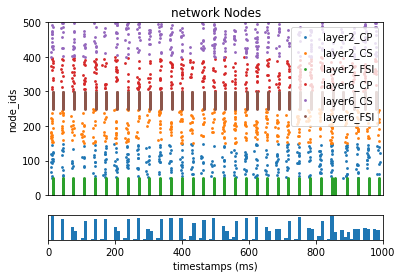

In [12]:
from bmtk.analyzer.spike_trains import plot_raster, plot_rates_boxplot

plot_raster(config_file='simulation_config.json', group_by='pop_name')

and the rates of each node

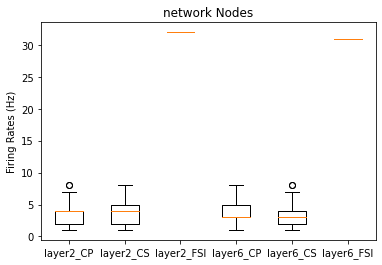

In [13]:
plot_rates_boxplot(config_file='simulation_config.json', group_by='pop_name')